In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [ ]:
# Making the format of dataset  into "time-series" in order to apply the "SARIMA".

In [6]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)


In [7]:
daily_sales = df.groupby('Order Date')['Sales'].sum()

In [8]:
daily_sales

Order Date
2015-01-03      16.4480
2015-01-04     288.0600
2015-01-05      19.5360
2015-01-06    4407.1000
2015-01-07      87.1580
                ...    
2018-12-26     814.5940
2018-12-27     177.6360
2018-12-28    1657.3508
2018-12-29    2915.5340
2018-12-30     713.7900
Name: Sales, Length: 1230, dtype: float64

In [20]:
daily_sales = daily_sales.sort_index()
daily_sales = daily_sales.asfreq('D')


In [21]:
daily_sales

Order Date
2015-01-03      16.4480
2015-01-04     288.0600
2015-01-05      19.5360
2015-01-06    4407.1000
2015-01-07      87.1580
                ...    
2018-12-26     814.5940
2018-12-27     177.6360
2018-12-28    1657.3508
2018-12-29    2915.5340
2018-12-30     713.7900
Freq: D, Name: Sales, Length: 1458, dtype: float64

In [22]:
# visualization to confirm surebility and seasonability

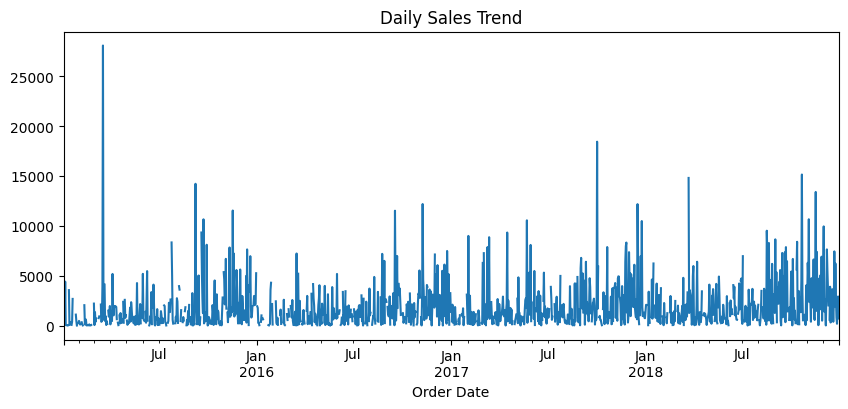

In [23]:
import matplotlib.pyplot as plt
daily_sales.plot(figsize = (10,4))
plt.title("Daily Sales Trend")
plt.show()

In [24]:
# Finally apply ARIMA model to our sales forecasting 

In [25]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [27]:

model = SARIMAX(
    daily_sales,
    order=(1,1,1),
    seasonal_order=(1,1,1,7) 
)

In [28]:
results = model.fit()
forecast = results.forecast(steps=30)

In [29]:
forecast

2018-12-31    3032.611095
2019-01-01    2937.570850
2019-01-02    1564.726172
2019-01-03    1235.269530
2019-01-04    2775.985120
2019-01-05    3415.509016
2019-01-06    2697.448544
2019-01-07    2987.989917
2019-01-08    2964.454905
2019-01-09    1612.416912
2019-01-10    1299.095141
2019-01-11    2843.066491
2019-01-12    3449.333587
2019-01-13    2811.026990
2019-01-14    2992.540168
2019-01-15    2972.848849
2019-01-16    1621.929300
2019-01-17    1309.474842
2019-01-18    2853.621202
2019-01-19    3458.100612
2019-01-20    2824.081106
2019-01-21    2999.733580
2019-01-22    2980.248875
2019-01-23    1629.389447
2019-01-24    1316.981611
2019-01-25    2861.137379
2019-01-26    3465.520693
2019-01-27    2831.731635
2019-01-28    3007.069073
2019-01-29    2987.595475
Freq: D, Name: predicted_mean, dtype: float64